In [1]:
!pip install category-encoders
from kafka import KafkaConsumer
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import classification_report,accuracy_score

import matplotlib.pyplot as plt
from sklearn.metrics import  accuracy_score , plot_confusion_matrix ,f1_score

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
import joblib
import  sklearn

import warnings
warnings.filterwarnings('ignore')



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pickle
from category_encoders.hashing import HashingEncoder


In [4]:
consumer = KafkaConsumer(
    'ml-raw-dns',
    bootstrap_servers="localhost:9092",
    auto_offset_reset='earliest',
    enable_auto_commit=False
)


In [5]:
# !pip install pandas --upgrade


In [6]:
for m in consumer:
        x=m.value
        break

In [7]:
x

b'"\\u00ef\\u00bb\\u00bftimestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack\\n"'

In [8]:
url = "Static_dataset.csv"
static_data = pd.read_csv(url)
static_data.shape


(268074, 16)

In [9]:
### remove thge null value 
static_data.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)


,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,33:51.5,18,3,0,16,0,2.338623,2,3,10,5.333333,alma,almaalomah,14,1,0
268070,36:02.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,0
268071,37:21.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
268072,24:25.1,16,0,0,14,0,3.249687,2,2,13,7.500000,radio,radio-vintage,14,0,0


In [10]:
####split the dat int features and taget and drop timestamp
X_s=static_data.drop(labels = ["Target Attack", "timestamp"], axis=1) 
y_s=static_data["Target Attack"]

In [11]:
##load hash encoder 
hash=pickle.load(open('./hashed_pickl_a.pkl','rb'))

In [12]:
##load roubst scaller 
roubst=pickle.load(open('./roubst_scaller_alldata_ver2.pkl', 'rb'))

In [13]:
##load the champion model tunned random forest with best feature  
model=pickle.load(open('./Final_rf_model2.pkl', 'rb'))

In [14]:
### i applied the hash encoder to convert the categorical feature 
X_s_new = hash.transform(X_s)
X_s_new = pd.DataFrame(X_s_new,columns = hash.get_feature_names())
X_s_new


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain
0,0,0,0,0,1,1,0,0,27,10,0,10,11,2.570417,6,6,7,3.666667,14,1
1,0,0,0,0,1,1,0,0,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1
2,0,0,0,0,1,1,0,0,26,9,0,10,10,2.742338,6,6,7,3.500000,13,1
3,0,0,0,0,1,1,0,0,27,10,0,10,11,2.570417,6,6,7,3.666667,14,1
4,0,0,2,0,0,0,0,0,15,9,0,11,0,2.929439,4,3,5,4.333333,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,1,0,0,0,1,0,0,0,18,3,0,16,0,2.338623,2,3,10,5.333333,14,1
268070,0,0,0,0,1,1,0,0,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1
268071,0,0,0,0,1,1,0,0,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1
268072,0,0,0,0,0,1,1,0,16,0,0,14,0,3.249687,2,2,13,7.500000,14,0


In [15]:
### i taked the name of columns from annova and i put it into anew dataframe 
X_s_new_updated=X_s_new[['col_0', 'col_1', 'col_4', 'col_5', 'col_6', 'col_7', 'FQDN_count',
        'subdomain_length', 'lower', 'numeric', 'special', 'labels', 'len',
        'subdomain']]


In [16]:
X_s_new_updated

,col_0,col_1,col_4,col_5,col_6,col_7,FQDN_count,subdomain_length,lower,numeric,special,labels,len,subdomain
0,0,0,1,1,0,0,27,10,10,11,6,6,14,1
1,0,0,1,1,0,0,27,10,10,11,6,6,14,1
2,0,0,1,1,0,0,26,9,10,10,6,6,13,1
3,0,0,1,1,0,0,27,10,10,11,6,6,14,1
4,0,0,0,0,0,0,15,9,11,0,4,3,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,1,0,1,0,0,0,18,3,16,0,2,3,14,1
268070,0,0,1,1,0,0,27,10,10,11,6,6,14,1
268071,0,0,1,1,0,0,27,10,10,11,6,6,14,1
268072,0,0,0,1,1,0,16,0,14,0,2,2,14,0


In [17]:
X_s_new_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   col_0             268074 non-null  int64
 1   col_1             268074 non-null  int64
 2   col_4             268074 non-null  int64
 3   col_5             268074 non-null  int64
 4   col_6             268074 non-null  int64
 5   col_7             268074 non-null  int64
 6   FQDN_count        268074 non-null  int64
 7   subdomain_length  268074 non-null  int64
 8   lower             268074 non-null  int64
 9   numeric           268074 non-null  int64
 10  special           268074 non-null  int64
 11  labels            268074 non-null  int64
 12  len               268074 non-null  int64
 13  subdomain         268074 non-null  int64
dtypes: int64(14)
memory usage: 28.6 MB


In [18]:
updated_data_scalled=roubst.transform(X_s_new_updated)

In [19]:
static_x=pd.DataFrame(updated_data_scalled,columns=X_s_new_updated.columns)

In [20]:
static_y=pd.DataFrame(y_s,columns=['Target Attack'])

In [21]:
Final_static=pd.concat([static_x,static_y],axis=1)

In [22]:
Final_static

,col_0,col_1,col_4,col_5,col_6,col_7,FQDN_count,subdomain_length,lower,numeric,special,labels,len,subdomain,Target Attack
0,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.428571,0.0,0.3,0.0,0.000000,0.666667,0.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.428571,0.0,0.3,0.0,0.000000,0.666667,0.0,1
2,0.0,0.0,0.0,1.0,0.0,0.0,0.222222,0.285714,0.0,0.2,0.0,0.000000,0.333333,0.0,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.428571,0.0,0.3,0.0,0.000000,0.666667,0.0,1
4,0.0,0.0,-1.0,0.0,0.0,0.0,-1.000000,0.285714,1.0,-0.8,-0.5,-1.000000,1.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,1.0,0.0,0.0,0.0,0.0,0.0,-0.666667,-0.571429,6.0,-0.8,-1.0,-1.000000,0.666667,0.0,0
268070,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.428571,0.0,0.3,0.0,0.000000,0.666667,0.0,0
268071,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.428571,0.0,0.3,0.0,0.000000,0.666667,0.0,1
268072,0.0,0.0,-1.0,1.0,1.0,0.0,-0.888889,-1.000000,4.0,-0.8,-1.0,-1.333333,0.666667,-1.0,0


In [23]:
ypredict=model.predict(updated_data_scalled)

In [24]:
ypredict

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [25]:
def one_window_1000_record(itr):
    window_1000_r=[]
    i=0
    for m in consumer:
        
        if i <1000:
            #print(f"recored {i+1} :", m.value)
            window_1000_r.append(m.value)
            i=i+1
        else:
            break
    print(f"Window {itr}")
   
    
    return window_1000_r        
        

In [33]:
column_names =["timestamp","FQDN_count","subdomain_length","upper","lower","numeric","entropy","special","labels","labels_max","labels_average","longest_word","sld","len","subdomain","Target Attack"]
def prepare_data( data):
    df=pd.DataFrame()
    list_of_row=[]
    for item in data:
        row_string=eval(item.decode("UTF-8"))
        row_string = row_string.strip()
        row= row_string.split(",")
        list_of_row.append(row)
    df=pd.DataFrame(list_of_row)
    df.columns=column_names
    return df

In [34]:
def data_preprocessing(data):
    data.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
    X_s=data.drop(labels = ["Target Attack", "timestamp"], axis=1) 
    y_s=data["Target Attack"]
    X_s_new = hash.transform(X_s)
    X_s_new = pd.DataFrame(X_s_new,columns = hash.get_feature_names())
    X_s_new_updated=X_s_new[['col_0', 'col_1', 'col_4', 'col_5', 'col_6', 'col_7', 'FQDN_count',
        'subdomain_length', 'lower', 'numeric', 'special', 'labels', 'len',
        'subdomain']]
    for i in X_s_new_updated.columns:
        X_s_new_updated[i]=pd.to_numeric(X_s_new_updated[i],errors='coerce')
        
    X_s_new_updated=X_s_new_updated.astype('float')   
    updated_data_scalled=roubst.transform(X_s_new_updated)
    static_x=pd.DataFrame(updated_data_scalled,columns=X_s_new_updated.columns)
    static_y=pd.DataFrame(y_s,columns=['Target Attack'])
    Final_static=pd.concat([static_x,static_y],axis=1)
    Final_static.dropna(inplace=True)
    
    return Final_static.astype('float')

In [35]:
static_model = pickle.load(open('./Final_rf_model2.pkl', 'rb'))
Dynamic_model = pickle.load(open('./Final_rf_model2.pkl', 'rb'))


In [36]:
def retrain_model(data):
    x=data.drop(labels=["Target Attack"],axis=1)
    y=data["Target Attack"]
    Dynamic_model.fit(x,y)
    return Dynamic_model

In [46]:
list_of_f1_Dynmaic_model=[]
list_of_f1_static_model=[]

list_of_recall_Dynmaic_model=[]
list_of_recall_static_model=[]

# recall_score()
for itr in range(267):
    r_dataset = one_window_1000_record(itr+1)
    
    p_dataset =  prepare_data(r_dataset)
    
    #print(p_dataset)
    static_data_p=p_dataset.copy()
    
    data_organized =  data_preprocessing(static_data_p)
    
    static_plus_new1000_record=Final_static.append(data_organized)
    
    x=data_organized.drop(labels=["Target Attack"],axis=1)
    y=data_organized["Target Attack"]

    Dy_pred=Dynamic_model.predict(x)
    D_f1_score=f1_score(y,Dy_pred)
    D_recall_score=recall_score(y,Dy_pred)
    
    print(f"F1_score of Dynamic Model without retrain = {D_f1_score*100}%")
    if D_f1_score < 0.86 or D_recall_score<0.999:

        print(" The model will be trained on the new data")
        Dynamic_model=retrain_model(static_plus_new1000_record)
        Dy_pred=Dynamic_model.predict(x)
        D_f1_score=f1_score(y,Dy_pred)
        print(f"F1 score of Dynamic Model after retrain = {D_f1_score*100}%")
        D_recall_score=recall_score(y,Dy_pred)
        print(f"Recall score of Dynamic Model after retrain = {D_recall_score*100}%")
    Sy_pred=static_model.predict(x)
    S_f1_score=f1_score(y,Sy_pred)
    print(f"F1 score of Static Model = {S_f1_score*100}%")
    
    S_recall_score=recall_score(y,Sy_pred)
    print(f"Recall score of Static Model = {S_recall_score*100}%")
    
    list_of_f1_Dynmaic_model.append(D_f1_score)
    list_of_f1_static_model.append(S_f1_score)
    
    list_of_recall_Dynmaic_model.append(D_recall_score)
    list_of_recall_static_model.append(S_recall_score)
    
    print(f"{'*'*20}")
   

Window 1
F1_score of Dynamic Model without retrain = 85.17397881996975%
 The model will be trained on the new data
F1 score of Dynamic Model after retrain = 85.17397881996975%
Recall score of Dynamic Model after retrain = 99.822695035461%
F1 score of Static Model = 85.17397881996975%
Recall score of Static Model = 99.822695035461%
********************
Window 2
F1_score of Dynamic Model without retrain = 84.97652582159624%
 The model will be trained on the new data
F1 score of Dynamic Model after retrain = 84.97652582159624%
Recall score of Dynamic Model after retrain = 100.0%
F1 score of Static Model = 84.97652582159624%
Recall score of Static Model = 100.0%
********************
Window 3
F1_score of Dynamic Model without retrain = 86.71641791044776%
 The model will be trained on the new data
F1 score of Dynamic Model after retrain = 86.71641791044776%
Recall score of Dynamic Model after retrain = 99.82817869415808%
F1 score of Static Model = 86.71641791044776%
Recall score of Static Mo

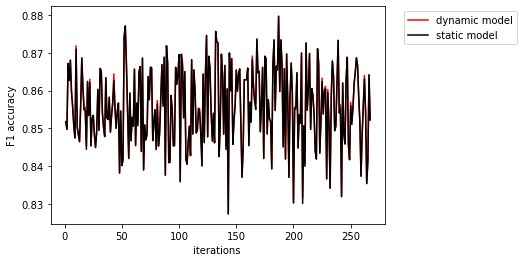

In [47]:
###plot f1 score for dynamic and static 
import matplotlib.pyplot as plt
plt.plot(range(1, 268), list_of_f1_Dynmaic_model, label=f'dynamic model',color='r')
plt.plot(range(1, 268),list_of_f1_static_model, label=f'static model',color='black')
plt.xlabel('iterations ')
#plt.xticks(range(1, 251))
plt.ylabel("F1 accuracy")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

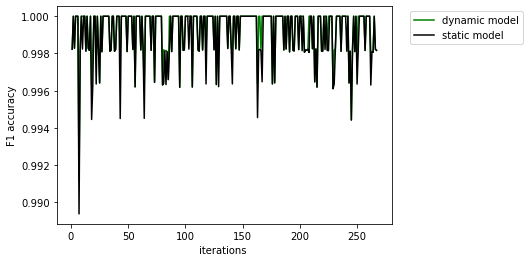

In [48]:
###plot Recall score for dynamic and static 
import matplotlib.pyplot as plt
plt.plot(range(1, 268), list_of_recall_Dynmaic_model, label=f'dynamic model',color='g')
plt.plot(range(1, 268),list_of_recall_static_model, label=f'static model',color='black')
plt.xlabel('iterations ')
plt.ylabel("F1 accuracy")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
